
100
---
 1

{'RiseTime': 0.10466295877245661, 'SettlingTime': 0.5698316644278193, 'SettlingMin': 0.8525863937391258, 'SettlingMax': 1.135501123590565, 'Overshoot': 24.916478606198062, 'Undershoot': 0, 'Peak': 1.135501123590565, 'PeakTime': 0.23258435282768136, 'SteadyStateValue': 0.9090082719752749}


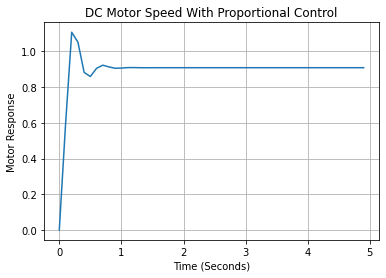

In [1]:
# This example shows the step response of DC motor with Proportional Controller

# Import Library
import numpy as np 
import control as ct 
from control.matlab import *
import matplotlib.pyplot as plt

# Transper Funtion of PID Controller
def pid_tf(Kp=0, Ki=0, Kd=0):
    # PID transfer function: Kp + Ki/s + Kd*s
    s = ct.TransferFunction.s
    return Kp + Ki / s + Kd * s

# DC motor Parameter
J = 0.01;
b = 0.1;
K = 0.01;
R = 1;
L = 0.5;

# DC motor Transfer Function
s = tf('s');
P_motor = K/((J*s+b)*(L*s+R)+K**2);

# Proportional Controller Gain & TF
Kp = 100;
pid = pid_tf(Kp);
print(pid)

# Open Loop Transfer Function of DC motor and proportional Controller
openloop_tf= ct.series(P_motor,pid)

# Closed Loop Transfer Function of DC motor and proportional Controller
closeloop_tf=ct.feedback(openloop_tf)

# Time array with sampling rate 0.01 and total duration 5
dt=0.1
sim_time=5
t = np.arange(0, sim_time, dt)  # Time from 0 to sim_time

#Getting Step Response
t,yout=ct.step_response(closeloop_tf,t)

a=ct.step_info(closeloop_tf)
print(a)

#Ploting Step Response
plt.title("DC Motor Speed With Proportional Control")
plt.plot(t,yout)
plt.xlabel("Time (Seconds)")
plt.ylabel("Motor Response")
plt.grid()
plt.show()
